In [1]:
import matplotlib.pyplot as plt 
import numpy as np

In [137]:
a = np.load('visualition_epochs/Evolution_Gan8.npy')

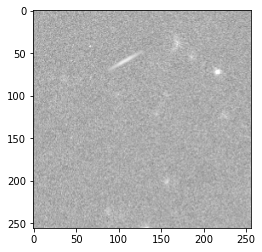

In [138]:
im = (a[0,0,:,:,:]*0.5+0.5)
plt.imshow(im)
import matplotlib
matplotlib.image.imsave('visualition_epochs/im3_1.png', im)

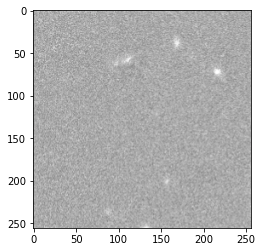

In [142]:
# gan à OK pe lr début
#gan 2 TRES BON EXEMPLE? GAN 6 bon exemple, GAN 8 
im = a[20,1,:,:,:]*0.5+0.5
plt.imshow(im)
matplotlib.image.imsave('visualition_epochs/im3_5.png', im)

In [2]:
datapath = 'trainset/'
name = "label"

In [3]:
X1 = np.load('X.npy')
X2 = np.load('X_trace.npy')
Y1 = np.load('Y.npy')
Y2 = np.load('Y_trace.npy')

In [34]:
import matplotlib

In [4]:
import numpy as np 
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow_examples.models.pix2pix import pix2pix
import matplotlib.pyplot as plt 

In [5]:
OUTPUT_CHANNELS = 3
generator_g_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
generator_f_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_x_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_y_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

generator_g = pix2pix.unet_generator(OUTPUT_CHANNELS, norm_type='instancenorm')
generator_f = pix2pix.unet_generator(OUTPUT_CHANNELS, norm_type='instancenorm')

discriminator_x = pix2pix.discriminator(norm_type='instancenorm', target=False)
discriminator_y = pix2pix.discriminator(norm_type='instancenorm', target=False)
#generator_g : X -> Y 
#generator_f : Y -> X

In [36]:
def generate_images(model, image, index):
  test_input = tf.cast(tf.reshape(tf.convert_to_tensor(image[index,:,:,:]),(1,256,256,3)), dtype = tf.float32)
  prediction = model(test_input)
    
  plt.figure(figsize=(12, 12))

  display_list = [test_input[0], prediction[0]]
  title = ['Input Image', 'Predicted Image']

  for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(title[i])
    # getting the pixel values between [0, 1] to plot it.
    plt.imshow(display_list[i] * 0.5 + 0.5)
    plt.axis('off')
  plt.show()
  return test_input[0].numpy()*0.5+0.5, prediction[0].numpy()*0.5+0.5

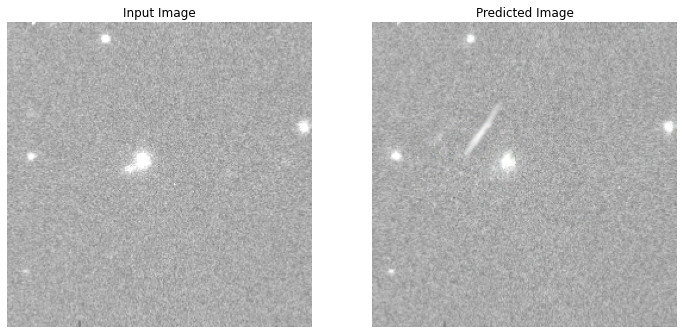

In [42]:
a, b = generate_images(generator_f, Y1, 1)
matplotlib.image.imsave('visualition_epochs/GAN6_1.png', a)
matplotlib.image.imsave('visualition_epochs/GAN6_2.png', b)

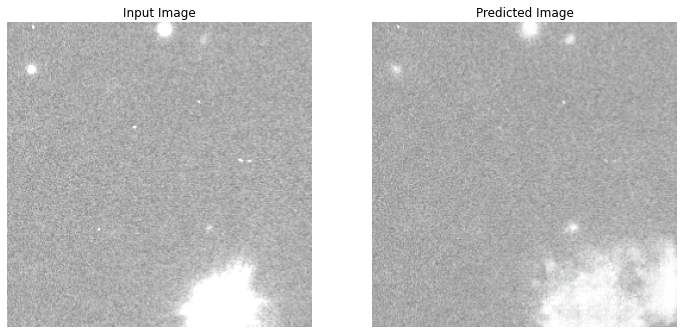

In [37]:
a, b = generate_images(generator_f, Y1, 3)
matplotlib.image.imsave('visualition_epochs/GAN1_1.png', a)
matplotlib.image.imsave('visualition_epochs/GAN1_2.png', b)

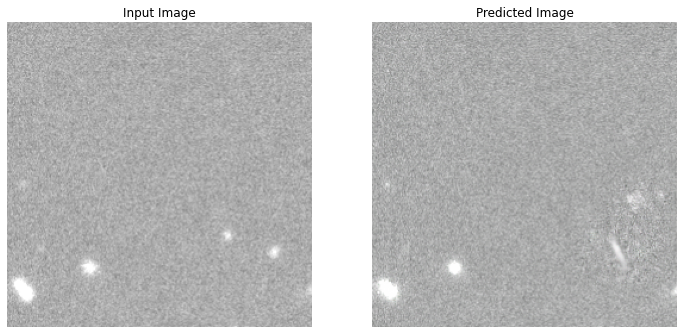

In [46]:
a, b = generate_images(generator_f, Y1, 18)


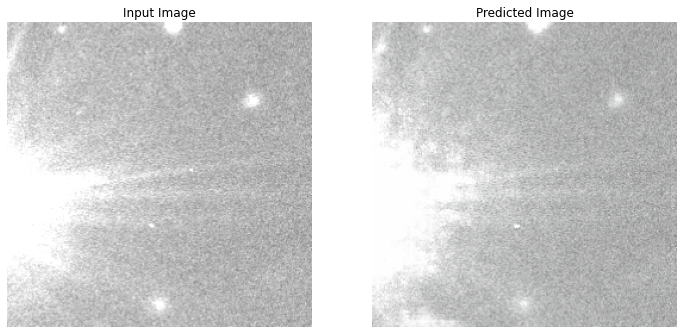

In [38]:
a, b = generate_images(generator_f, Y1, 8)
matplotlib.image.imsave('visualition_epochs/GAN2_1.png', a)
matplotlib.image.imsave('visualition_epochs/GAN2_2.png', b)

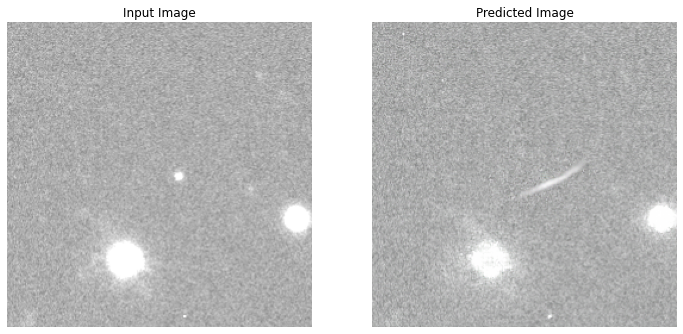

In [39]:
a, b = generate_images(generator_f, Y1, 10)
matplotlib.image.imsave('visualition_epochs/GAN3_1.png', a)
matplotlib.image.imsave('visualition_epochs/GAN3_2.png', b)

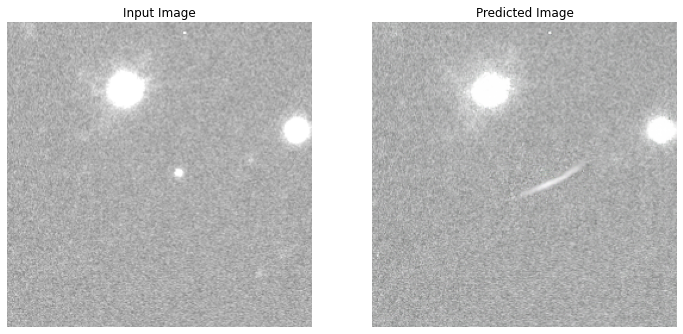

In [40]:
a, b = generate_images(generator_f, Y1, 11)
matplotlib.image.imsave('visualition_epochs/GAN4_1.png', a)
matplotlib.image.imsave('visualition_epochs/GAN4_2.png', b)

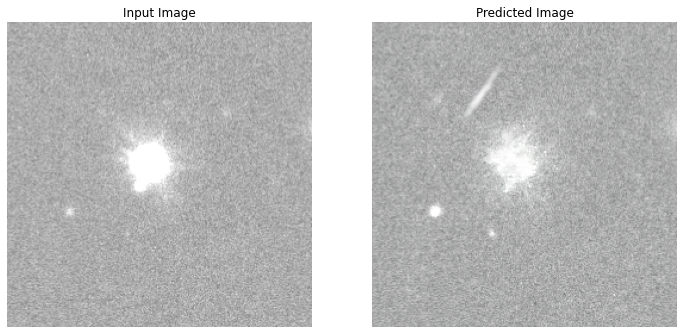

In [41]:
a, b = generate_images(generator_f, Y1, 12)
matplotlib.image.imsave('visualition_epochs/GAN5_1.png', a)
matplotlib.image.imsave('visualition_epochs/GAN5_2.png', b)

In [8]:
# restore the CheckPoint : 
checkpoint_path = "./checkpoints/train"

ckpt = tf.train.Checkpoint(generator_g=generator_g,
                           generator_f=generator_f,
                           discriminator_x=discriminator_x,
                           discriminator_y=discriminator_y,
                           generator_g_optimizer=generator_g_optimizer,
                           generator_f_optimizer=generator_f_optimizer,
                           discriminator_x_optimizer=discriminator_x_optimizer,
                           discriminator_y_optimizer=discriminator_y_optimizer)
#We only keep the last 5 ones.
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)
# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)
  print ('Latest checkpoint restored!!')

Latest checkpoint restored!!


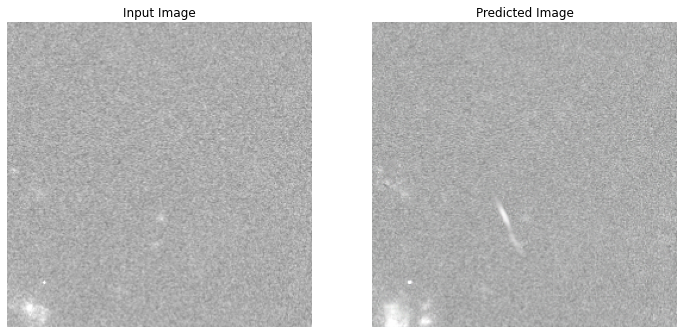

In [9]:
generate_images(generator_f, Y1, 27)

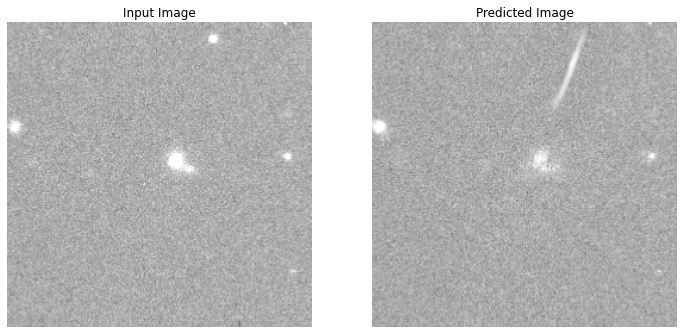

In [11]:
generate_images(generator_f, Y1, 2)

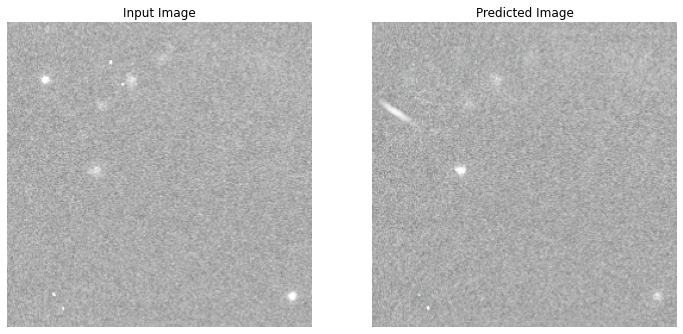

In [12]:
generate_images(generator_f, Y1, 4)

In [12]:
def new_image(model, test_input):
  prediction = model(test_input)
  return prediction[0].numpy()

In [13]:
X_transformed = np.zeros(shape = (750,256,256,3))
for i in range(20) : 
    X_transformed[i,:,:,:] = new_image(generator_g, tf.cast(tf.reshape(tf.convert_to_tensor(X1[i,:,:,:]),(1,256,256,3)), dtype = tf.float32))

In [5]:
def unison_shuffled_copies(a, b):
    print(len(a),len(b))
    assert len(a) == len(b)
    print(len(a), len(b))
    p = np.random.permutation(len(a))
    print(p[0:5])
    return a[p], b[p]

In [6]:
X_all, y_all_shuf = unison_shuffled_copies(np.concatenate((X1[:,:,:,0], Y1[:,:,:,0])), np.concatenate((X2, Y2)))

3000 3000
3000 3000
[ 605  175  295 1649 1745]


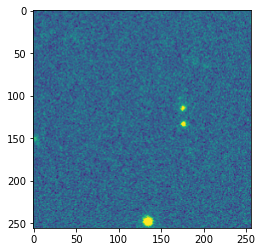

In [14]:
plt.imshow(X_all[5,:,:])

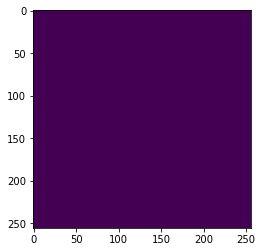

In [15]:
plt.imshow(y_all_shuf[5,:,:])

In [16]:
np.save('CNN_trainingSet\X_train',X_all)

In [17]:
np.save('CNN_trainingSet\Y_train',y_all_shuf)

In [2]:
import numpy as np 

In [5]:
X_train = np.load('CNN_trainingSet\X_train.npy')

In [6]:
np.shape(X_train)

(3000, 256, 256)

In [7]:
import matplotlib.pyplot as plt 

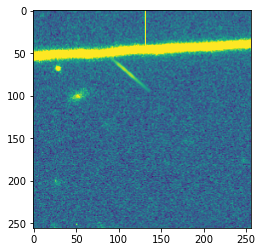

In [8]:
plt.imshow(X_train[0,:,:])